# **Soil Moisture Prediction**
### ECE3502 - IoT Domain Analyst
### Random Forest Algorithm

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

### Dataset Inspection

In [4]:
d = pd.read_csv('Dataset.csv')

In [5]:
d.head()

,MoisturePercentage,Humidity,Heatcelcius
0,0.6491,0.617,35.1
1,0.6999,0.628,35.1
2,0.6999,0.631,35.1
3,0.7019,0.646,35.1
4,0.7009,0.648,35.1


In [6]:
d.describe() 

,MoisturePercentage,Humidity,Heatcelcius
count,93.000000,93.00000,93.000000
mean,0.560731,0.68272,34.973118
std,0.099847,0.04892,0.187744
min,0.450600,0.60100,34.600000
25%,0.477000,0.64400,34.800000
50%,0.530800,0.66200,35.000000
75%,0.639300,0.72000,35.100000
max,0.741900,0.79300,35.300000


In [7]:
d.shape 

(93, 3)

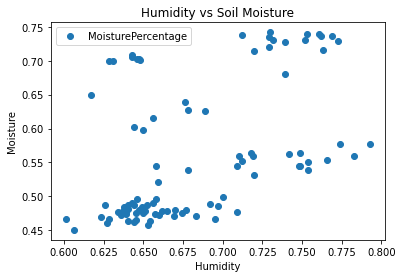

In [8]:
d.plot(x='Humidity', y='MoisturePercentage', style='o')  
plt.title('Humidity vs Soil Moisture')  
plt.xlabel('Humidity')  
plt.ylabel('Moisture')  
plt.show()  

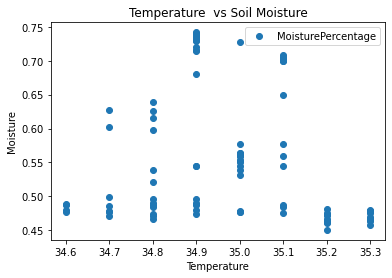

In [9]:
d.plot(x='Heatcelcius', y='MoisturePercentage', style='o')  
plt.title('Temperature  vs Soil Moisture')  
plt.xlabel('Temperature')  
plt.ylabel('Moisture')  
plt.show()

### Test-train Split for RF

In [10]:
x = d.iloc[:, 1:3].values
y = d.iloc[:, 0].values

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=1) 

In [12]:
s = StandardScaler()  
xtrain = s.fit_transform(xtrain)  
xtest = s.transform(xtest) 

### Random Forest Regression

In [13]:
r1 = RandomForestRegressor(n_estimators=20, random_state=25) 

In [14]:
r1.fit(xtrain, ytrain)
p1 = r1.predict(xtest)

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, p1))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, p1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, p1)))

Mean Absolute Error: 0.023497499999999887
Mean Squared Error: 0.0016237838074999937
Root Mean Squared Error: 0.040296200906537


In [16]:
df1 = pd.DataFrame({'Actual': ytest, 'Predicted': p1})  
df1

,Actual,Predicted
0,0.7204,0.736460
1,0.5513,0.545660
2,0.4702,0.464965
3,0.7361,0.728080
4,0.4712,0.580320
5,0.4741,0.481610
6,0.5601,0.620480
7,0.7390,0.729915
8,0.7370,0.724225
9,0.4751,0.476250


In [17]:
print("Training Accuracy = ", (r1.score(xtrain, ytrain)*100), "%")
print("Test Accuracy = ", (r1.score(xtest, ytest)*100), "%")

Training Accuracy =  90.15959467969579 %
Test Accuracy =  88.36267098141299 %
